In [1]:
<<../../src/Generato.wl

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
These packages come with ABSOLUTELY NO WARRANTY; for details type\
 
>   Disclaimer[]. This is free software, and you are welcome to redistribute\
 
>   it under certain conditions. See the General Public License for details.
------------------------------------------------------------
------------------------------------------------------------
Package xAct`xCoba`  version 0.8.6, {2021, 2, 28}
CopyRight (C) 2005-2021, David Yllanes and Jose M. Martin-Garcia, under t

## Setup

In [2]:
SetPVerbose[False];
SetPrintDate[False];
SetGridPointIndex["[[ijk]]"];
DefManifold[M4, 4, Union[Complement[IndexRange[a, z], {g}], Table[ToExpression["h" <> ToString[i]], {i, 1, 9}], Table[ToExpression["z" <> ToString[i]], {i, 1, 9}]]];
DefChart[cart, M4, {0, 1, 2, 3}, {T[], X[], Y[], Z[]}, ChartColor -> Green];

## Grid and Temporary Functions

In [7]:
dtEvolVarlist = GridTensors[
    {dtg[-a, -b], Symmetric[{-a, -b}]},
    {dtPi[-a, -b], Symmetric[{-a, -b}], PrintAs -> "dt\[CapitalPi]"},
    {dtPhi[-k, -a, -b], Symmetric[{-a, -b}], PrintAs -> "dt\[CapitalPhi]"}
];
EvolVarlist = GridTensors[
    {g[-a, -b], Symmetric[{-a, -b}]},
    {Pi$Upt[-a, -b], Symmetric[{-a, -b}], PrintAs -> "\[CapitalPi]"},
    {Phi[-k, -a, -b], Symmetric[{-a, -b}], PrintAs -> "\[CapitalPhi]"},
    {H[-a]}
];
MoreInVarlist = GridTensors[
    {Adg[-a, -b], Symmetric[{-a, -b}]},
    {AdPi[-a, -b], Symmetric[{-a, -b}], PrintAs -> "Ad\[CapitalPi]"},
    {AdPhi[-k, -a, -b], Symmetric[{-a, -b}], PrintAs -> "Ad\[CapitalPhi]"},
    {alpha[], PrintAs -> "\[Alpha]"},
    {beta[i], PrintAs -> "\[Beta]"},
    {srcSdH[-a, -b], Symmetric[{-a, -b}], PrintAs -> "\!\(\*SubscriptBox[\(\[PartialD]\), \((a\)]\)\!\(\*SubscriptBox[\(H\), \(\(b\)\()\)\)]\)"}
];
TempVarlist = TempTensors[
    {detinvh[], PrintAs -> "\[Gamma]"},
    {invh[i, j], Symmetric[{i, j}], PrintAs -> "\[Gamma]"},
    {nvec[a], PrintAs -> "n"},
    {ndua[-a], PrintAs -> "n"},
    {invg[a, b], Symmetric[{a, b}], PrintAs -> "g"},
    {dginFO[-c, -a, -b], Symmetric[{-a, -b}], PrintAs -> "dg"},
    {Gam[-c, -a, -b], Symmetric[{-a, -b}], PrintAs -> "\[CapitalGamma]"},
    {trGam[-a], PrintAs -> "\[CapitalGamma]"}
];

## Constants

In [11]:
DefConstantSymbol[gamma0, PrintAs -> "\!\(\*SubscriptBox[\(\[Gamma]\), \(0\)]\)"];
DefConstantSymbol[gamma1, PrintAs -> "\!\(\*SubscriptBox[\(\[Gamma]\), \(1\)]\)"];
DefConstantSymbol[gamma2, PrintAs -> "\!\(\*SubscriptBox[\(\[Gamma]\), \(2\)]\)"];
DefConstantSymbol[interior, PrintAs -> "I"];

## Equations

In [15]:
Module[{Mat, invMat},
    Mat = Table[g[{aa, -cart}, {bb, -cart}] // ToValues, {aa, 1, 3}, {bb, 1, 3}];
    invMat = Inverse[Mat] /. {1 / Det[Mat] -> (detinvh[] // ToValues)};
    SetEQNDelayed[detinvh[], 1 / Det[Mat] // Simplify];
    SetEQNDelayed[invh[i_, j_], invMat[[i[[1]], j[[1]]]] // Simplify]
];
SetEQNDelayed[nvec[a_], If[a[[1]] == 0, alpha[] ^ -1, -alpha[] ^ -1 beta[a]]];
SetEQNDelayed[ndua[a_], If[a[[1]] == 0, -alpha[], 0.0]];
SetEQN[invg[a_, b_], invh[a, b] - nvec[a] nvec[b]];
SetEQNDelayed[dginFO[c_, a_, b_], If[c[[1]] == 0, -alpha[] Pi$Upt[a, b] + beta[k] Phi[-k, a, b], Phi[c, a, b]]];
SetEQN[Gam[c_, a_, b_], 1/2 (dginFO[a, b, c] + dginFO[b, c, a] - dginFO[c, a, b])];
SetEQN[trGam[c_], invg[a, b] Gam[c, -a, -b]];

SetEQN[dtg[a_, b_], -Adg[a, b] interior - alpha[] Pi$Upt[a, b] - gamma1
     beta[c] Phi[-c, a, b]];
SetEQN[dtPi[a_, b_], -AdPi[a, b] interior + 2 alpha[] invg[c, d] (invh[
    i, j] Phi[-i, -c, a] Phi[-j, -d, b] - Pi$Upt[-c, a] Pi$Upt[-d, b] - invg[
    e, f] Gam[a, -c, -e] Gam[b, -d, -f]) - 1/2 alpha[] nvec[c] nvec[d] Pi$Upt[
    -c, -d] Pi$Upt[a, b] - alpha[] nvec[c] Pi$Upt[-c, -i] invh[i, j] Phi[
    -j, a, b] + 2 alpha[] (invg[c, d] Gam[-c, a, b] H[-d]) + gamma0 alpha[
    ] ((H[a] + trGam[a]) ndua[b] + (H[b] + trGam[b]) ndua[a] - g[a, b] nvec[
    c] (H[-c] + trGam[-c])) - gamma1 gamma2 beta[i] Phi[-i, a, b] - srcSdH[
    a, b]];
SetEQN[dtPhi[i_, a_, b_], -AdPhi[i, a, b] interior + 1/2 alpha[] nvec[
    c] nvec[d] Phi[i, -c, -d] Pi$Upt[a, b] + alpha[] invh[j, k] nvec[c] Phi[
    i, -j, -c] Phi[-k, a, b] - gamma2 alpha[] Phi[i, a, b]];

### Check expression

-(interior Adg[-a, -b]) - gamma1 beta[c] Phi[-c, -a, -b] - alpha[] Pi$Upt[-a, -b]
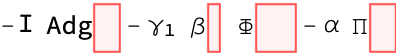

In [25]:
dtg$RHS[-a, -b]

-(interior AdPi[-a, -b]) + 2 alpha[] Gam[-c, -a, -b] H[-d] invg[c, d] - 
 
>   gamma1 gamma2 beta[c] Phi[-c, -a, -b] - 
 
>   alpha[] invh[d, e] nvec[c] Phi[-e, -a, -b] Pi$Upt[-c, -d] - 
 
    alpha[] nvec[c] nvec[d] Pi$Upt[-a, -b] Pi$Upt[-c, -d]
>   ----------------------------------------------------- + 
                              2
 
>   2 alpha[] invg[c, d] (-(Gam[-a, -c, -e] Gam[-b, -d, -f] invg[e, f]) + 
 
>      invh[h, h1] Phi[-h, -c, -a] Phi[-h1, -d, -b] - Pi$Upt[-c, -a] Pi$Upt[-d, -b]) - 
 
>   srcSdH[-a, -b] + gamma0 alpha[] 
 
>    (ndua[-b] (H[-a] + trGam[-a]) + ndua[-a] (H[-b] + trGam[-b]) - 
 
>      g[-a, -b] nvec[c] (H[-c] + trGam[-c]))
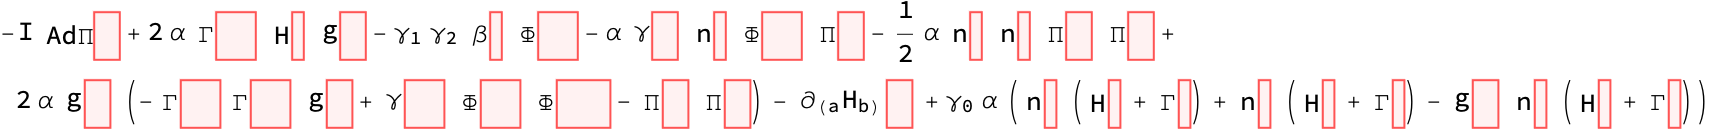

In [26]:
dtPi$RHS[-a, -b]

-(interior AdPhi[-k, -a, -b]) - gamma2 alpha[] Phi[-k, -a, -b] + 
 
>   alpha[] invh[d, e] nvec[c] Phi[-e, -a, -b] Phi[-k, -d, -c] + 
 
    alpha[] nvec[c] nvec[d] Phi[-k, -c, -d] Pi$Upt[-a, -b]
>   ------------------------------------------------------
                              2
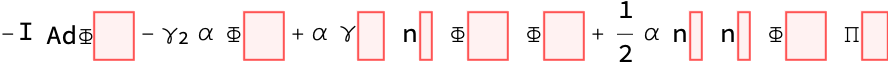

In [27]:
dtPhi$RHS[-k, -a, -b]

## Write to files

In [28]:
SetOutputFile["GHG_rhs.c"];
SetProject["GHG"];

In [30]:
$MainPrint[] :=
    Module[{project = GetProject[]},
        pr["#include \"nmesh.h\""];
        pr["#include \"" <> project <> ".h\""];
        pr[];
        pr["#define Power(x,y) (pow((double) (x),(double) (y)))"];
        pr["#define Log(x) log((double) (x))"];
        pr["#define pow2(x) ((x)*(x))"];
        pr["#define pow2inv(x) (1.0/((x)*(x)))"];
        pr["#define Cal(x,y,z) ((x)?(y):(z))"];
        pr["#define Sqrt(x) sqrt(x)"];
        pr["#define Abs(x) fabs(x)"];
        pr[];
        pr["/* use globals from " <> project <> " */"];
        pr["extern t" <> project <> " " <> project <> "[1];"];
        pr[];
        pr[];
        pr["int GHG_rhs(tNode *node, tVarList *vlr, tVarList *vlu)"];

        pr["{"];
        pr["tMesh *mesh = node->pat->mesh;"];
        pr["int ialpha = Ind(\"ADM_alpha\");"];
        pr["int ibetax = Ind(\"ADM_betax\");"];
        pr["int iAdgtt = Ind(\"GHG_Adgtt\");"];
        pr["int iAdPitt = Ind(\"GHG_AdPitt\");"];
        pr["int iAdPhixtt = Ind(\"GHG_AdPhixtt\");"];
        pr["int isrcSdHtt = Ind(\"GHG_srcSdHtt\");"];
        pr["int fc[6];"];
        pr["int ijk;"];
        pr[];
        PrintInitializations[{Mode -> "MainOut"}, dtEvolVarlist];
        PrintInitializations[{Mode -> "MainIn"}, EvolVarlist];
        PrintInitializations[{Mode -> "MoreInOut"}, MoreInVarlist];
        pr[];
        pr["TIMER_START;"];
        pr[];
        pr["/* compute */"];
        pr["forpoints(node, ijk)"];
        pr["{"];
        (* parameters *)
        pr["double interior = !(ind_on_nodeface(node, ijk, fc));"];
        pr["double gammas[3], gamma0, gamma1, gamma2;"];
        pr["GHG_gammas(node, ijk, gammas);"];
        pr["gamma0 = gammas[0];"];
        pr["gamma1 = gammas[1];"];
        pr["gamma2 = gammas[2];"];
        pr[];
        PrintEquations[{Mode -> "Temp"}, TempVarlist];
        pr[];
        PrintEquations[{Mode -> "Main"}, dtEvolVarlist];
        pr["} /* end of points */"];
        pr[];
        pr["TIMER_STOP;"];
        pr[];
        pr["return 0;"];
        pr["} /* end of function */"];
    ];

In [31]:
<<../../codes/Nmesh.wl

Writing to "GHG_rhs.c"...

"GHG_rhs.c" already exist, replacing it ...

Done generating "GHG_rhs.c"

